## <center> Cars dataset - Prediction of Miles per gallon for cars </center>

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset:
- cars-dataset-1.csv

Attribute Information:

- Car Name – Name of the car

- Cyl – No of cylinders in the car – Multivalued discrete

- Disp – Displacement – continuous

- Hp – Horsepower – continuous

- Wt – Weight – continuous

- Acc – Accleration – continuous

- Yr – Model of the car – Multivalued discrete

Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) 
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters
4. Use linear regression model on different clusters separately and print the coefficients of the models individually

#### Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 250

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from scipy.stats import zscore

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#### Store the data in cars_df

In [2]:
cars_df = pd.read_csv('cars-dataset.csv')

### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

#### View first 5 rows of dataset:

In [3]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


#### Dropping car name column:

In [4]:
cars_df.drop('car name', axis=1, inplace=True)

**Inference:**
    
    I'm dropping car name as it merely acts like an identifier and will be less helpful in model building

#### View the shape of dataset:

In [5]:
cars_df.shape

(398, 7)

**Inference:**
    
    Cars dataset after removing car name has 398 rows and 7 columns

#### Check the datatype of columns:

In [6]:
cars_df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

**Inference:**
    
    Except 'hp', other columns are numeric. 'hp', which is supposed to be numeric, is of type object which might possibly           indicate some missing value. Let's handle it in the next step.

#### Check for missing values:

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


**Inference:**
    
    info doesn't show any missing value. Let's sort the data in ascending/descending to find the missing value

#### Sort 'hp' column, and view head & tail to identify any missing values

In [8]:
cars_df.sort_values(by=['hp']).head()

,cyl,disp,hp,wt,acc,yr,mpg
133,6,250.0,100,3781,17.0,74,16.0
98,6,250.0,100,3278,18.0,73,16.0
256,6,225.0,100,3430,17.2,78,20.5
107,6,232.0,100,2789,15.0,73,18.0
334,3,70.0,100,2420,12.5,80,23.7


**Inference:**
    
    Data in 'hp' looks good now. Let's sort it in descending to explore further.

In [9]:
cars_df.sort_values(by=['hp']).tail()

,cyl,disp,hp,wt,acc,yr,mpg
126,6,200.0,?,2875,17.0,74,21.0
374,4,151.0,?,3035,20.5,82,23.0
354,4,100.0,?,2320,15.8,81,34.5
32,4,98.0,?,2046,19.0,71,25.0
336,4,140.0,?,2905,14.3,80,23.6


**Inference:**
    
    As observed '?' is present in the supposed-to-be-numeric 'hp' column. Let's check how many '?' are present in 'hp'             column

#### Check how many '?' are present in 'hp' column

In [10]:
cars_df[cars_df['hp'] == '?']

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


**Inference:**
    
    As observed, totally are are 6 '?' present in the 'hp' column.

**Other columns will not have '?' in them as their data types are numeric.**

#### Replace '?' in hp column with nan

In [11]:
cars_df = cars_df.replace('?', np.nan)

In [12]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [13]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      392 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


#### Handle missing values in hp column

In [14]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


#### Replace nan in hp column with its median value

In [15]:
cars_df['hp'] = cars_df[['hp']].fillna(value=cars_df.filter(['hp']).median())

In [16]:
cars_df.isna().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

#### Pair plot to see data distribution:

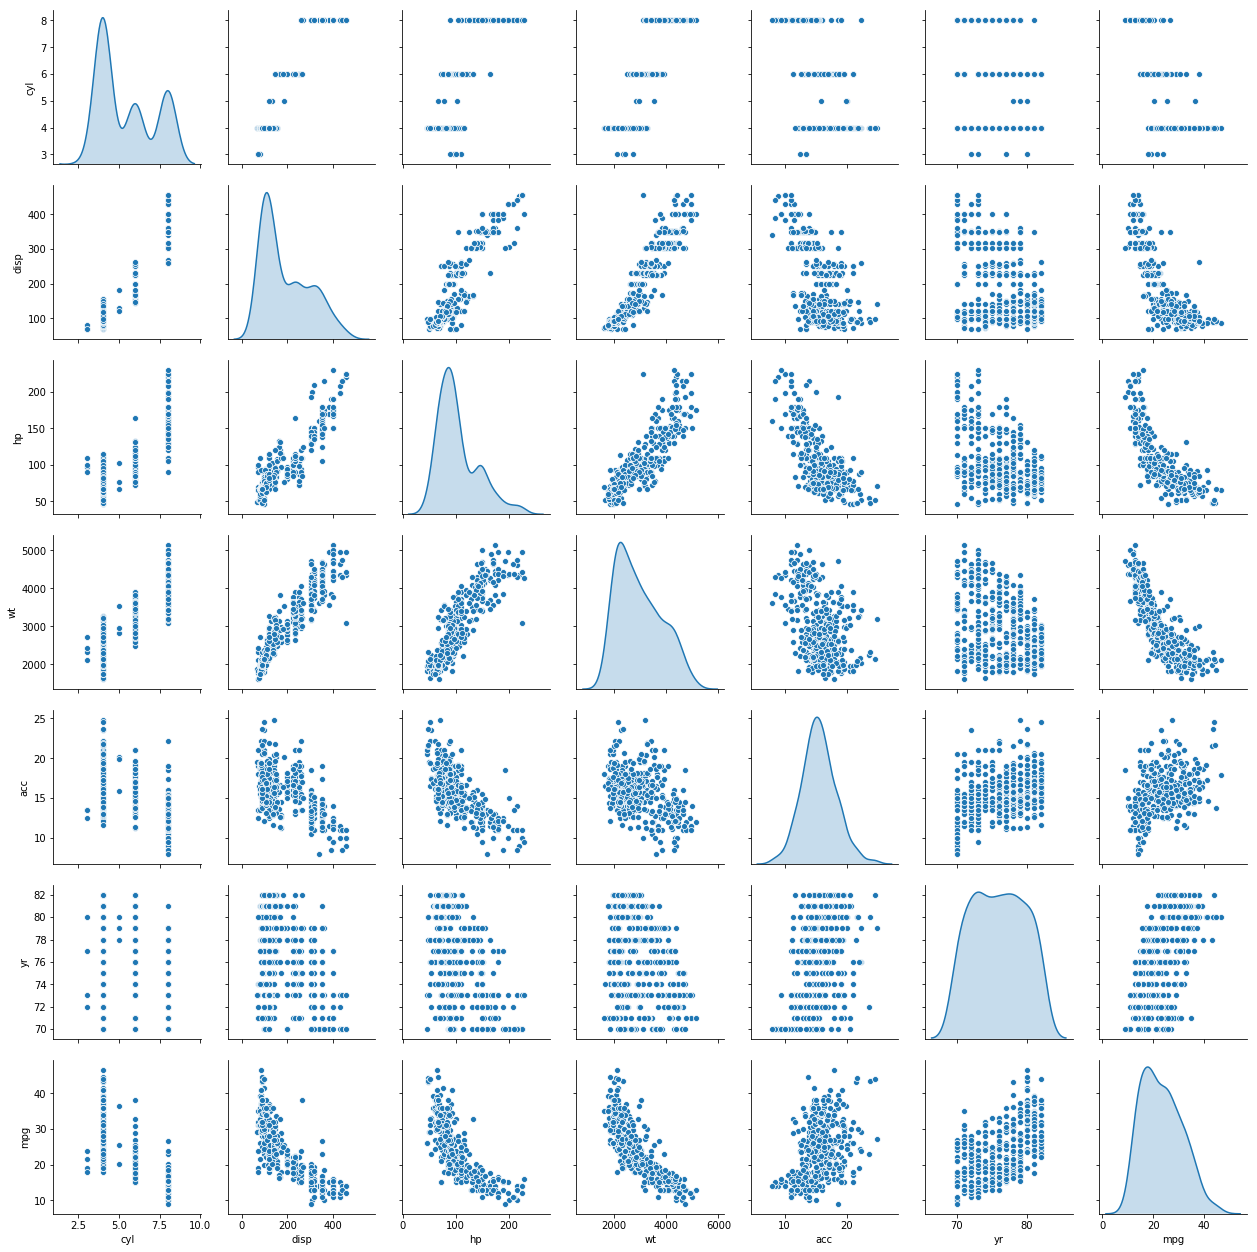

In [17]:
sns.pairplot(cars_df, diag_kind = 'kde' )

**Inference:**
    
    Cluster analysis:
    
    - cyl data has 3 clusters within itself
    - displacement also looks to have 3 clusters, although barely distinguishable
    - hp data looks to have 2 clusters
    - weight, acceleration, year and mpg do not have specific clusters
    
**The overall cars dataset might contain data in 3 - 4 clusters.**

#### Let's try to view these clusters now:

In [18]:
# mpg Vs cyl

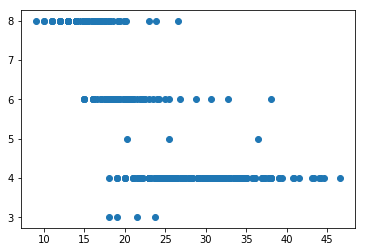

In [19]:
plt.scatter(cars_df['mpg'], cars_df['cyl'])

#### Correlation - heatmap

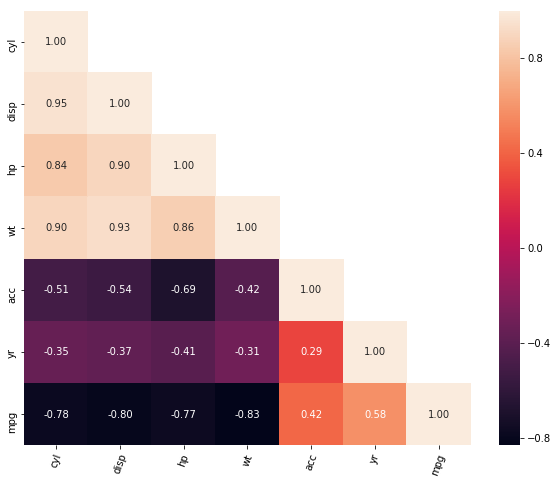

In [20]:
plt.figure(figsize=(10,8))
mask = np.zeros_like(cars_df.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(cars_df.corr(), mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=70)

**Inference:**
    
    - As seen, acc and yr have least correlation with the target, mpg
    - wt has a strong negative correlation with mpg
    - Similarly displacement also has a strong negative correlation with mpg

#### Standardize data:

I'm using zscore to standardize the data

In [21]:
cars_df = cars_df.drop('yr', axis=1)
cars_df_z = cars_df.apply(zscore)

In [22]:
cars_df_z.head()

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543


### 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

### K Means Clustering

In [23]:
cluster_range = range(2, 10)  # expecting 3 to 4 clusters from the pair panel visual inspection, hence restricting from 2 to 9
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=5)
    clusters.fit(cars_df)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428438e+07
1,3,3.420304e+07
2,4,1.905189e+07
3,5,1.376415e+07
4,6,1.028936e+07
5,7,7.766183e+06
6,8,5.664004e+06
7,9,4.722009e+06


#### Elbow plot to choose optimal K value:

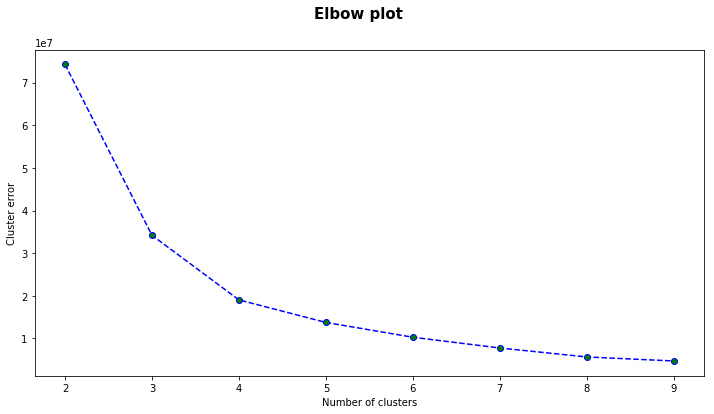

In [24]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor = 'green')
plt.suptitle('Elbow plot', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster error')
plt.show()

**Inference:**
    
    The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters. Let us start with 3 clusters

#### KMeans with cluster as 3:

In [25]:
cluster = KMeans( n_clusters = 3, random_state = 7 )
cluster.fit(cars_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [26]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [27]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z))
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
1,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


#### Predict the cluster for data points:

In [28]:
prediction = cluster.predict(cars_df_z)
cars_df_z["group"] = prediction          # Creating a new column "group" which will hold the cluster id of each record

#### Let's view the head of predicted datapoints:

In [29]:
cars_df_z.head()    

,cyl,disp,hp,wt,acc,mpg,group
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1


#### Count of data under different labels:

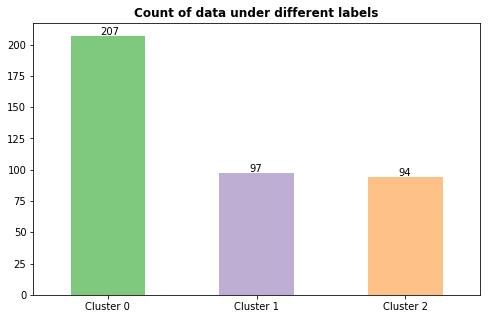

In [30]:
plt.subplots(figsize=(8,5)) 

labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
xlabels = [i for i in labels]

ax = cars_df_z['group'].value_counts().plot.bar(color=sns.color_palette('Accent',20))
ax.set_title('Count of data under different labels', fontweight = 'bold')
ax.set_xticklabels(xlabels, rotation=0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+.2,p.get_height()+1))

**Inference:**
    
    Cluster 0 has more number of data points, followed by Cluster 1 and then by Cluster 2

#### Instead of interpreting the numerical values of the centroids, let us do a visual analysis by converting the centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002291D44C9B0>,
      dtype=object)

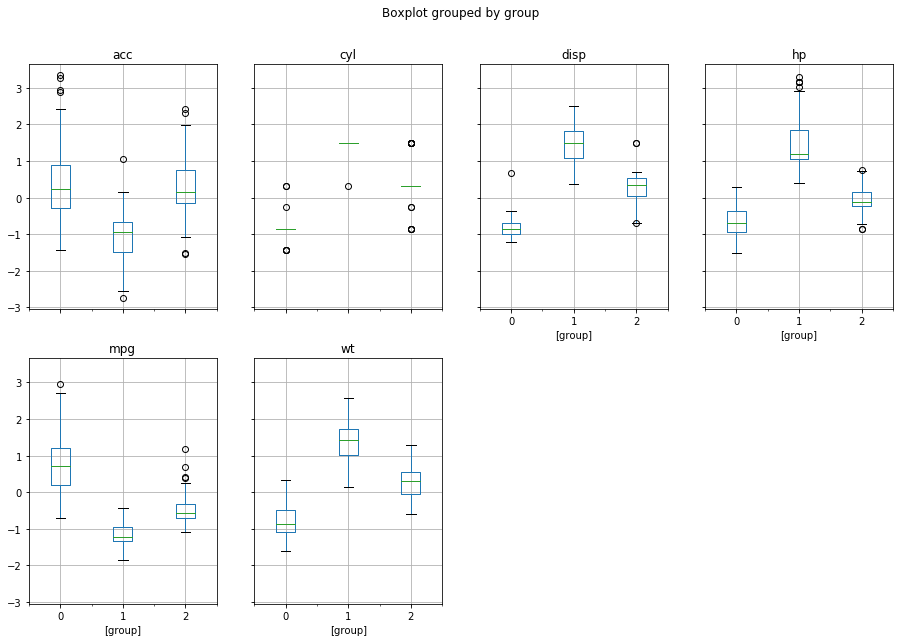

In [31]:
cars_df_z.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10))

**Inference:**
    
    - There are many outliers on each dimension (indicated by the black circles)
    - Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
    - If the outliers are addressed, the clusters will overlap much less than right now 

#### Addressing outliers at group level:

In [32]:
data = cars_df_z   
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_z['group']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002291D411A90>,
      dtype=object)

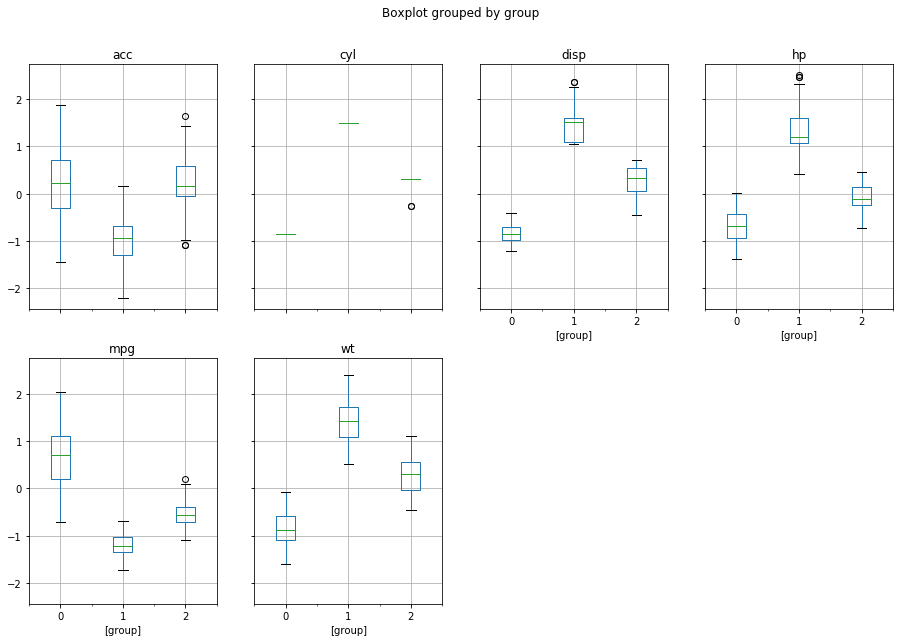

In [33]:
concat_data.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10))

**Inference:**
    
    When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept        them without modifying them


### Split the data into 3 as we have 3 different clusters:

> cluster_0_df --> group 0 <br>
> cluster_1_df --> group 1 <br>
> cluster_2_df --> group 2 

In [34]:
cluster_0_df = cars_df_z[cars_df_z['group'] == 0]
cluster_1_df = cars_df_z[cars_df_z['group'] == 1]
cluster_2_df = cars_df_z[cars_df_z['group'] == 2]

print('Total number of records in Cluster 0: ', len(cluster_0_df))
print('Total number of records in Cluster 1: ', len(cluster_1_df))
print('Total number of records in Cluster 2: ', len(cluster_2_df))

Total number of records in Cluster 0:  207
Total number of records in Cluster 1:  97
Total number of records in Cluster 2:  94


### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually

### Linear Regression:

#### Before building the model, let's check the relation between independent variables and target now:

In [35]:
corr_with_target = pd.DataFrame(cars_df_z.corr().abs().loc['mpg'])
corr_with_target.drop(['mpg','group'], axis=0,inplace=True) # Drop target variable itself as we know self correlation would be 1
                                                            # Also dropping the newly introduced cluster label
corr_with_target.rename(columns={'mpg': 'Corr value'}, inplace=True)

corr_with_target.sort_values(by='Corr value',ascending=False)

,Corr value
wt,0.831741
disp,0.804203
cyl,0.775396
hp,0.773453
acc,0.420289


**Inference:**
    
    Except acceleration, other columns have a good correlation with the target

### Let's visualize these correlation 

#### wt Vs mpg:

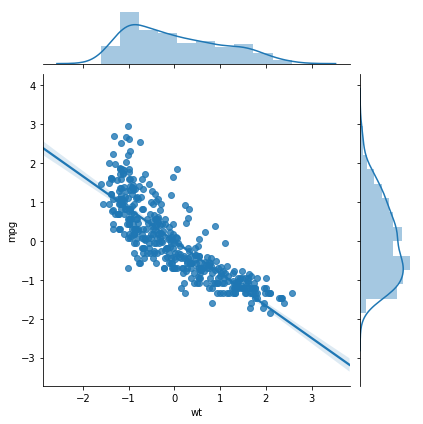

In [36]:
sns.jointplot("wt", "mpg", data=cars_df_z, kind='reg')

**Inference:**
     
    Weight and mpg has a strong negative correlation. 

#### disp Vs mpg

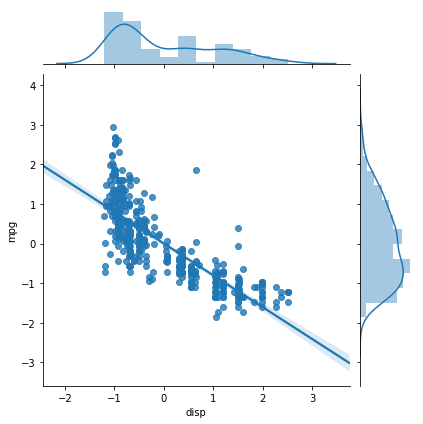

In [37]:
sns.jointplot("disp", "mpg", data=cars_df_z, kind='reg')

**Inference:**
     
    Displacement and mpg also has a strong negative correlation. 

#### cyl Vs mpg

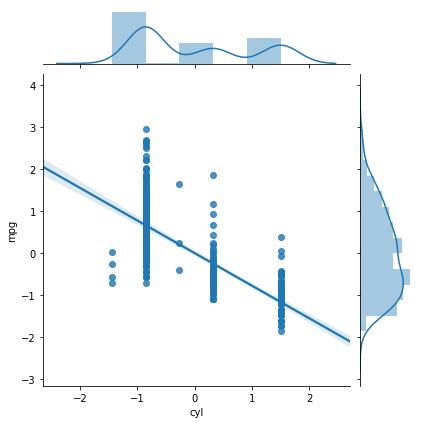

In [38]:
sns.jointplot("cyl", "mpg", data=cars_df_z, kind='reg')

**Inference:**
     
    Cylinder and mpg also has a moderate negative correlation. 

#### hp Vs mpg

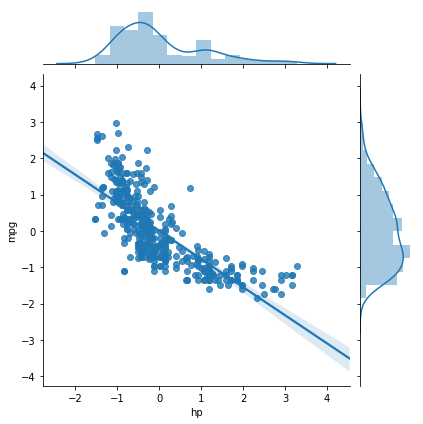

In [39]:
sns.jointplot("hp", "mpg", data=cars_df_z, kind='reg');

**Inference:**
     
    hp and mpg also has a moderate negative correlation. 

#### acc Vs mpg

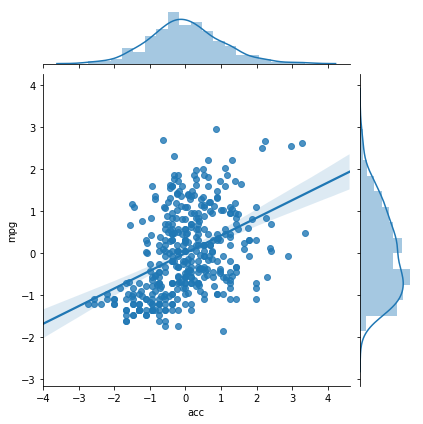

In [40]:
sns.jointplot("acc", "mpg", data=cars_df_z, kind='reg');

**Inference:**
     
    Accleration and mpg also has a least positive correlation. We could see a denser regression line

### Build regression model on individual clusters:

**Adjusted $R^{2}$:**

Adjusted $R^{2}$ = $1 -$ $(1 - R^{2}) (N - 1) \over {N - p - 1}$

where, <br>
> $R^{2}$ = sample $R^{2}$ <br>
> p = Number of predictors <br>
> N = Total sample size

In [41]:
## Adjusted R^2

def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

#### Function: Linearmodel

In [42]:
def linearmodel(cluster, model, df):
    
    X = df.drop(columns=['mpg', 'group'], axis=1)
    y = df['mpg']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Train accuracies:
    model.fit(X_train, y_train)
    train_R2 = model.score(X_train, y_train).round(2)
    y_train_pred = model.predict(X_train).round(2)
    train_mse = metrics.mean_squared_error(y_train_pred, y_train).round(2)
    train_rmse = np.sqrt(train_mse).round(2)
    train_adj_r2 = AdjRsquare(model, X_train, y_train).round(2)

# intercept & co-efficient of model:
    intercept = model.intercept_
    coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['']).round(2)

    trainAccuracies = [cluster, train_mse, train_rmse, train_R2, train_adj_r2, intercept, coeff_df]

# Test accuracies:
    test_R2 = model.score(X_test, y_test).round(2)
    y_test_pred = model.predict(X_test).round(2)
    test_mse = metrics.mean_squared_error(y_test_pred, y_test).round(2)
    test_rmse = np.sqrt(test_mse).round(2)
    test_adj_r2 = AdjRsquare(model, X_test, y_test).round(2)
        
    testAccuracies = [cluster, test_mse, test_rmse, test_R2, test_adj_r2, 'NA', 'NA']
       
    resultsDf = pd.DataFrame(index = ["cluster", "mse", "rmse", "r2", "adjR2", "intercept", "Coeff"],)
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    
    return(resultsDf)

#### Instantiate Linear Regression:

In [43]:
linreg = LinearRegression()

### Cluster 0:

In [44]:
result_0_cluster = linearmodel(0, linreg, cluster_0_df)
 
print('\033[1m1. Scores of Cluster 0 model: \033[0m\n\n', result_0_cluster.iloc[0:5])

print('\n\033[1m2. Intercept of cluster 0 model:\033[0m %.2f' % result_0_cluster.iloc[5][0])

print('\n\033[1m3. Coefficients of cluster 0 model: \033[0m', result_0_cluster.iloc[6][0])

1. Scores of Cluster 0 model: 

         trainData testData
cluster         0        0
mse          0.33     0.33
rmse         0.57     0.57
r2           0.38     0.36
adjR2        0.36      0.3

2. Intercept of cluster 0 model: 1.16

3. Coefficients of cluster 0 model:            
cyl   1.67
disp -0.49
hp   -0.87
wt   -0.11
acc  -0.09


**Inference:**
    
- The coefficients of model on cluster 0 can be interpreted as follows:
> For every 1 unit increase in cylinder, the mpg of the car goes up by 1.67 units <br>
> For every 1 unit increase in displacement, the mpg of the car goes down by 0.49 units <br>
> For every 1 unit increase in horse power, the mpg of the car goes down by 0.87 units and so on <br>
- Model performance is not very good on Cluster 0 as Adjusted R square (0.3) is very low

### Cluster 1:

In [45]:
result_1_cluster = linearmodel(1, linreg, cluster_1_df)

print('\033[1m1. Scores of Cluster 1 model: \033[0m\n\n', result_1_cluster.iloc[0:5])

print('\n\033[1m2. Intercept of cluster 1 model: \033[0m %.2f' % result_1_cluster.iloc[5][0])

print('\n\033[1m3. Coefficients of cluster 1 model: \033[0m', result_1_cluster.iloc[6][0])

1. Scores of Cluster 1 model: 

         trainData testData
cluster         1        1
mse          0.04     0.05
rmse          0.2     0.22
r2           0.37     0.39
adjR2        0.31     0.26

2. Intercept of cluster 1 model:  -0.35

3. Coefficients of cluster 1 model:            
cyl  -0.34
disp  0.07
hp   -0.20
wt   -0.14
acc  -0.11


**Inference:**
    
- The coefficients of model on cluster 1 can be interpreted as follows:
> For every 1 unit increase in cylinder, the mpg of the car goes down by 0.34 units <br>
> For every 1 unit increase in displacement, the mpg of the car goes up by 0.07 units <br>
> For every 1 unit increase in horse power, the mpg of the car goes down by 0.20 units and so on <br>
- Model performance is not very good on Cluster 1 as Adjusted R square (0.26) is very low

### Cluster 2:

In [46]:
result_2_cluster = linearmodel(2, linreg, cluster_2_df)

print('\033[1m1. Scores of Cluster 2 model: \033[0m\n\n', result_2_cluster.iloc[0:5])

print('\n\033[1m2. Intercept of cluster 2 model:\033[0m %.2f' % result_2_cluster.iloc[5][0])

print('\n\033[1m3. Coefficients of cluster 2 model:\033[0m ', result_2_cluster.iloc[6][0])

1. Scores of Cluster 2 model: 

         trainData testData
cluster         2        2
mse          0.14     0.06
rmse         0.37     0.24
r2            0.2     0.45
adjR2        0.13     0.33

2. Intercept of cluster 2 model: -0.43

3. Coefficients of cluster 2 model:            
cyl   0.34
disp -0.20
hp    0.06
wt   -0.31
acc  -0.03


**Inference:**
    
- The coefficients of model on cluster 2 can be interpreted as follows:
> For every 1 unit increase in cylinder, the mpg of the car goes up by 0.34 units <br>
> For every 1 unit increase in displacement, the mpg of the car goes down by 0.20 units <br>
> For every 1 unit increase in horse power, the mpg of the car goes up by 0.06 units and so on <br>
- Model performance is not very good on Cluster 2 as Adjusted R square (0.33) is very low

### Linear regression for overall data:

In [47]:
result = linearmodel('NA', linreg, cars_df_z)

print('\033[1mScores of overall model: \033[0m\n', result.iloc[0:5])

print('\n\033[1mIntercept of overall model:\033[0m %.2f' % result.iloc[5][0])

print('\n\033[1mCoefficients of overall model: \033[0m', result.iloc[6][0])

Scores of overall model: 
         trainData testData
cluster        NA       NA
mse          0.29     0.32
rmse         0.54     0.57
r2           0.72     0.64
adjR2        0.72     0.62

Intercept of overall model: 0.01

Coefficients of overall model:            
cyl  -0.18
disp -0.01
hp   -0.16
wt   -0.55
acc  -0.03


**Inference:**
    
- The coefficients of model on overall data can be interpreted as follows:
> For every 1 unit increase in cylinder, the mpg of the car goes down by 0.18 units <br>
> For every 1 unit increase in displacement, the mpg of the car goes down by 0.01 units <br>
> For every 1 unit increase in horse power, the mpg of the car goes down by 0.16 units and so on <br>
- Model performance is better on overall data as compared to individual clusters as Adjusted R square (0.62) has improved

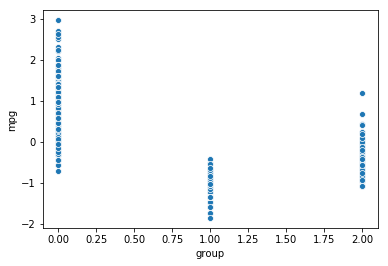

In [48]:
sns.scatterplot(cars_df_z['group'],cars_df_z['mpg'])

### Overall Analysis on cars-dataset:

- Read the cars-dataset and stored in cars_df dataframe
- Dataset initially had 398 rows and 8 columns
- Dropped the car name and year columns as they will not be much useful in building the model.
- Checked the datatypes of columns and they were numeric, so no encoding was needed
- hp column alone had missing values as '?'. Replace the missing value by the median of that particular column
- Visualized the data distribution using pairplot. This gave us an approximate idea that 3 to 4 clusters could be present in the data
- Standardized the data using zScore

**KMeans Clustering:**
- Used KMeans Clustering to find the hidden clusters in the data. 
- Using elbow method, found the approximate optimal number of clusters to be 3
- Found the centroids for these clusters.
- The data was distributed in such a way that cluster 0 had 207 data points, cluster 1 had 97 and cluster 2 had 94 data points
- Performed a visual analysis by converting the centroids and the data in the cluster into box plots. Could see presence of outliers now.
- Addressed the oultiers at group level by replacing the outliers with the group median

**Correlation & data split:**
- Correlation of each and every column with the target was checked and was also visually represented using jointplot
- Three clusters were split into 3 dataframes and linear regression model was applied separately on the individual dataframes

**Linear Regression:**
- Cluster 0:
> - MSE for train data was found to be 0.33 and that of test was also 0.33
> - RMSE for train data was found to be 0.57 and that of test was also 0.57
> - R squared value for train data was found to be 0.38 and that of test was also 0.36
> - Adjusted R squared value for train data was found to be 0.36 and that of test was also 0.30
> - Intercept of this model was found to be 1.16 and the coefficients were also calculated

- Cluster 1:
> - MSE for train data was found to be 0.04 and that of test was 0.05
> - RMSE for train data was found to be 0.20 and that of test was 0.22
> - R squared value for train data was found to be 0.37 and that of test was also 0.39
> - Adjusted R squared value for train data was found to be 0.31 and that of test was also 0.26
> - Intercept of this model was found to be -0.35 and the coefficients were also calculated

- Cluster 2:
> - MSE for train data was found to be 0.14 and that of test was 0.06
> - RMSE for train data was found to be 0.37 and that of test was 0.24
> - R squared value for train data was found to be 0.20 and that of test was also 0.45
> - Adjusted R squared value for train data was found to be 0.13 and that of test was also 0.33
> - Intercept of this model was found to be -0.43 and the coefficients were also calculated

**Model performance is poor on clusters, however model has performed better on cluster 2 as compared to that on other clusters**

- Linear Regression on overall dataset without clusters:
> - MSE for train data was found to be 0.29 and that of test was 0.32
> - RMSE for train data was found to be 0.54 and that of test was 0.57
> - R squared value for train data was found to be 0.72 and that of test was also 0.64
> - Adjusted R squared value for train data was found to be 0.72 and that of test was also 0.62
> - Intercept of this model was found to be 0.01 and the coefficients were also calculated

**Linear Regression on the entire dataset has performed well compared to the model performance on individual clusters**